В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на файл у репозиторії GitHub
Файл `process_bank_churn.py` був успішно завантажений на GitHub. Його можна знайти його за посиланням:
[process_bank_churn.py](https://github.com/tvkravtsova/machine_learning_tasks/blob/main/process_bank_churn.py)

Завантажуємо файл з GitHub



In [168]:
!wget https://raw.githubusercontent.com/tvkravtsova/machine_learning_tasks/main/process_bank_churn.py

--2025-02-09 18:32:56--  https://raw.githubusercontent.com/tvkravtsova/machine_learning_tasks/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7801 (7.6K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   7.62K  --.-KB/s    in 0s      

2025-02-09 18:32:56 (53.2 MB/s) - ‘process_bank_churn.py’ saved [7801/7801]



Тепер імпортуємо функцію `preprocess_data` з цього файлу в нашому Colab Notebook:

In [169]:
# Підключення автозавантаження, що дозволить автоматично перевантажувати змінені модулі Python
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
from process_bank_churn import preprocess_data, preprocess_new_data

In [171]:
import pandas as pd

raw_df = pd.read_csv('train.csv')

In [172]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [173]:
processed_data = preprocess_data(raw_df, scaler_numeric= False)

In [175]:
processed_data

{'X_train':        CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 8263         696.0  32.0     5.0  130627.66            1.0        1.0   
 14199        632.0  32.0     4.0  119825.75            1.0        1.0   
 1856         679.0  22.0     4.0       0.00            2.0        1.0   
 3013         705.0  48.0     3.0       0.00            2.0        1.0   
 8266         696.0  35.0     7.0       0.00            2.0        1.0   
 ...            ...   ...     ...        ...            ...        ...   
 9493         633.0  33.0     4.0       0.00            2.0        0.0   
 7687         645.0  33.0     3.0   87541.06            1.0        1.0   
 8143         621.0  29.0     8.0       0.00            2.0        1.0   
 11512        590.0  42.0     7.0       0.00            2.0        0.0   
 1292         749.0  34.0     3.0  143321.97            1.0        1.0   
 
        IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
 8263              

Ми викликали функцію preprocess_data, яка:


- розділила дані на тренувальні (X_train, train_targets) і валідаційні (X_val, val_targets)


- масштабує числові ознаки (але тут scaler_numeric=False, тобто масштабування не використовується)


- закодувала категоріальні ознаки за допомогою OneHotEncoding


- зберегла результати в словник

Розпакуємо значення з словника processed_data в окремі змінні:


X_train: ознаки для тренування.


train_targets: цільові значення для тренування.


X_val: ознаки для валідації.


val_targets: цільові значення для валідації.


Ці змінні будемо використовувати для тренування моделі та оцінки її ефективності на валідаційних даних.

In [176]:
X_train, train_targets, X_val, val_targets = processed_data['X_train'], processed_data['train_targets'], processed_data['X_val'], processed_data['val_targets']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Створення та тренування дерева рішень
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, train_targets)

# Оцінка моделі
train_auc = roc_auc_score(train_targets, model_dt.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(val_targets, model_dt.predict_proba(X_val)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Train AUC: 1.0000
Test AUC: 0.7631


Виведені значення Train AUC: 1.0000 і Test AUC: 0.7631 вказують на перенавчання (overfitting).

Модель ідеально прогнозує цільову змінну на тренувальних даних, але це значення на валідаційних даних вже значно гірше, ніж на тренувальних.

Модель не здатна добре генералізувати на нові дані.

In [182]:
# Виведення глибини дерева
print(f"Depth of the tree: {model_dt.get_depth()}")

Depth of the tree: 25


Ми бачимо, що після тренування моделі дерево має глибину 25, це є ще одним індикатором перенавчання. Велика глибина дерева дозволяє моделі дуже точно підлаштовуватися під тренувальні дані, що призводить до того, що вона "запам'ятовує" шум або специфічні особливості цих даних.

In [183]:
# Побудова дерева до глибини 2
model_dt_depth2 = DecisionTreeClassifier(random_state=42, max_depth=2)
model_dt_depth2.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=2, random_state=42)

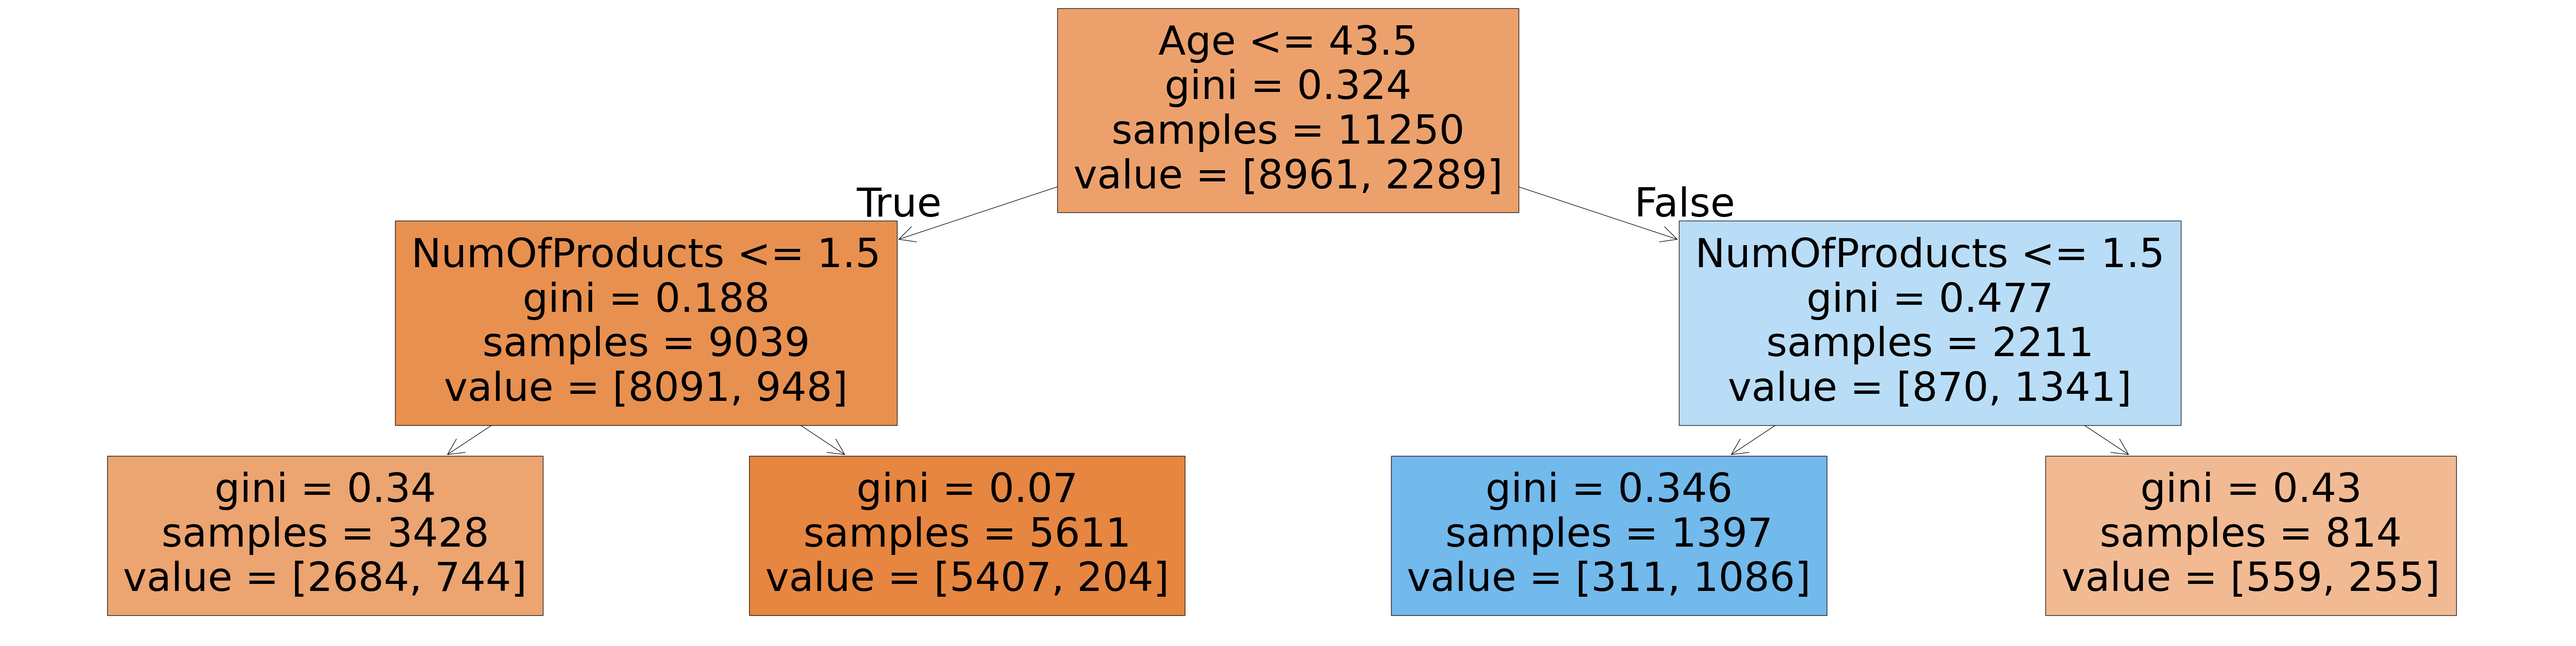

In [184]:
plt.figure(figsize=(80,20))
plot_tree(model_dt_depth2, feature_names=X_train.columns, max_depth=2, filled=True);

На цьому дереві прийняття рішень (decision tree) найбільш впливовими ознаками є:

Вік клієнта (Age) – це перший вузол дерева, тобто найважливіша змінна для розподілу даних. Граничне значення – 43.5 роки.


Кількість продуктів (NumOfProducts) – ця ознака є другою за важливістю


Значення Gini відображає ступінь неоднорідності даних: чим ближче до 0, тим чистіший вузол, тобто класи краще розділені й у ньому менше змішаних даних.

Отже, основними факторами, що впливають на прийняття рішення в цьому дереві, є вік клієнта та кількість придбаних продуктів.

Повернемося до попередньої моделі і виведемо топ 10 найвпливовіших ознак

In [191]:
# Оцінка важливості ознак
importances = model_dt.feature_importances_

# Створення DataFrame для важливості
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})
# Сортуємо по важливості та виводимо топ 10
importance_df = importance_df.sort_values(by='importance', ascending=False)
top_10_importance = importance_df.head(10)

print(top_10_importance)


              feature  importance
1                 Age    0.346301
4       NumOfProducts    0.167947
7     EstimatedSalary    0.131605
0         CreditScore    0.117156
3             Balance    0.081201
2              Tenure    0.061639
6      IsActiveMember    0.033070
9   Geography_Germany    0.015503
5           HasCrCard    0.014113
11      Gender_Female    0.009814


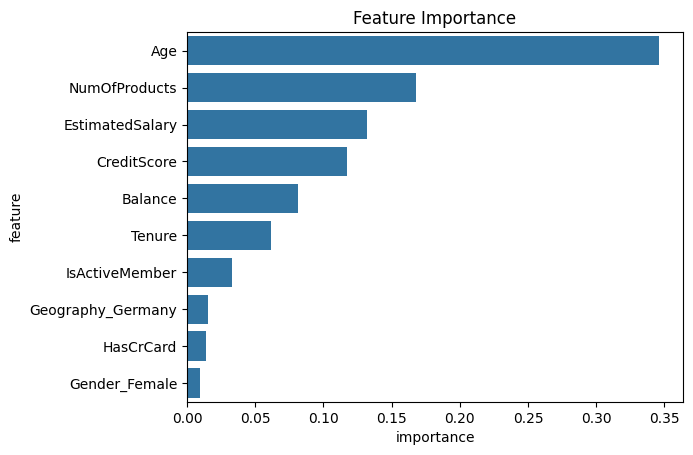

In [190]:
# Побудова графіка важливості ознак
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Виведені значення показують відносну важливість кожної ознаки у побудові моделі. Найвпливовішими є вік, кількість банківських продуктів та зарплата.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [150]:
param_combinations = [
    (3, 5), (5, 10), (10, 15), (None, 5), (3, None)
]

results = []

for max_depth, max_leaf_nodes in param_combinations:
    # Створення та тренування моделі
    dt_model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    dt_model.fit(X_train, train_targets)

    # Прогнози для тренувальних та валідаційних даних
    train_preds_proba = dt_model.predict_proba(X_train)[:, 1]
    val_preds_proba = dt_model.predict_proba(X_val)[:, 1]

    # Обчислення AUROC
    train_auc = roc_auc_score(train_targets, train_preds_proba)
    val_auc = roc_auc_score(val_targets, val_preds_proba)

    # Збереження результатів
    results.append({
        'max_depth': max_depth,
        'max_leaf_nodes': max_leaf_nodes,
        'train_auc': train_auc,
        'val_auc': val_auc
    })

# Перетворимо результати в DataFrame
results_df = pd.DataFrame(results)

# Виведемо результати
print(results_df)

   max_depth  max_leaf_nodes  train_auc   val_auc
0        3.0             5.0   0.867448  0.865240
1        5.0            10.0   0.901013  0.901845
2       10.0            15.0   0.913351  0.915035
3        NaN             5.0   0.867448  0.865240
4        3.0             NaN   0.896683  0.893916


Ми визначили комбінації гіперпараметрів (max_depth – максимальна глибина дерева, max_leaf_nodes – максимальна кількість листових вузлів).

Для кожної комбінації натренували DecisionTreeClassifier та обчислили AUROC  для тренувального (train_auc) і валідаційного (val_auc) наборів.

Оптимальна комбінація у нашому випадку – max_depth=10, max_leaf_nodes=15, оскільки вона має найвищий AUROC і на тренуванні, і на валідації (0.913 / 0.915)


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [151]:
# Список для зберігання результатів
train_aucs = []
val_aucs = []

# Проходимо по значеннях max_depth від 1 до 20
for max_depth in range(1, 21):
    # Створення та тренування моделі
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, train_targets)

    # Прогнози для тренувальних та валідаційних даних
    train_preds_proba = dt_model.predict_proba(X_train)[:, 1]
    val_preds_proba = dt_model.predict_proba(X_val)[:, 1]

    # Обчислення AUROC
    train_auc = roc_auc_score(train_targets, train_preds_proba)
    val_auc = roc_auc_score(val_targets, val_preds_proba)

    # Додаємо значення до списків
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    # Вивід AUROC для кожного max_depth
    print(f"Глибина: {max_depth} | Train AUROC: {train_auc:.4f} | Validation AUROC: {val_auc:.4f}")


Глибина: 1 | Train AUROC: 0.7444 | Validation AUROC: 0.7379
Глибина: 2 | Train AUROC: 0.8420 | Validation AUROC: 0.8488
Глибина: 3 | Train AUROC: 0.8967 | Validation AUROC: 0.8939
Глибина: 4 | Train AUROC: 0.9108 | Validation AUROC: 0.9126
Глибина: 5 | Train AUROC: 0.9255 | Validation AUROC: 0.9199
Глибина: 6 | Train AUROC: 0.9341 | Validation AUROC: 0.9167
Глибина: 7 | Train AUROC: 0.9423 | Validation AUROC: 0.9153
Глибина: 8 | Train AUROC: 0.9509 | Validation AUROC: 0.9021
Глибина: 9 | Train AUROC: 0.9610 | Validation AUROC: 0.8702
Глибина: 10 | Train AUROC: 0.9702 | Validation AUROC: 0.8507
Глибина: 11 | Train AUROC: 0.9791 | Validation AUROC: 0.8371
Глибина: 12 | Train AUROC: 0.9860 | Validation AUROC: 0.8225
Глибина: 13 | Train AUROC: 0.9920 | Validation AUROC: 0.8125
Глибина: 14 | Train AUROC: 0.9958 | Validation AUROC: 0.7885
Глибина: 15 | Train AUROC: 0.9979 | Validation AUROC: 0.7827
Глибина: 16 | Train AUROC: 0.9989 | Validation AUROC: 0.7759
Глибина: 17 | Train AUROC: 0.9994

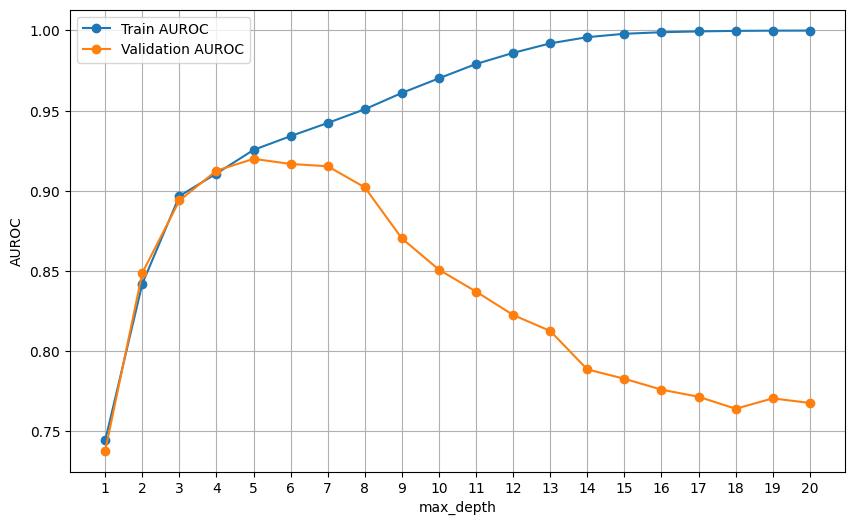

In [152]:
# Побудуємо графік залежності AUROC від глибини дерева для тренувальних і валідаційних даних
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_aucs, label='Train AUROC', marker='o')
plt.plot(range(1, 21), val_aucs, label='Validation AUROC', marker='o')
plt.xticks(range(1, 21))
plt.xlabel('max_depth')
plt.ylabel('AUROC')
plt.legend()
plt.grid(True)
plt.show()

Глибина 5 дає найкращий баланс між тренувальним і валідаційним AUROC.
Глибина 6 трохи покращує тренувальний AUROC, але валідаційний вже починає спадати.
Виберемо для Submission на Kaggle модель, що забезпечує найбільш оптимальний баланс між точністю і генералізацією,тобто з глибиною max_depth = 5.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


Тренуємо модель з глибиною max_depth=5

In [205]:
model_dt_depth5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model_dt_depth5.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [206]:
# Оцінка моделі
train_auc = roc_auc_score(train_targets, model_dt_depth5.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(val_targets, model_dt_depth5.predict_proba(X_val)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train AUC: 0.9255
Test AUC: 0.9199


In [207]:
new_df = pd.read_csv('test.csv')

In [208]:
new_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [209]:
# Обробка нових даних за допомогою раніше навчених скейлера та енкодера
new_processed_data = preprocess_new_data(
    new_data=new_df,
    input_cols=processed_data['input_cols'],# new_df - нові дані, які потрібно обробити
    scaler=processed_data['scaler'],  # Раніше навчений скейлер
    encoder=processed_data['encoder']  # Раніше навчений енкодер
)

In [210]:
new_processed_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0


In [211]:
# Робимо пердбачення
test_preds_proba = model_dt_depth5.predict_proba(new_processed_data)[:, 1]

In [212]:
test_preds_proba

array([0.21896163, 0.02883263, 0.02883263, ..., 0.00894919, 0.04106074,
       0.20190275])

In [213]:
submission_df = pd.read_csv('/content/sample_submission.csv', index_col=0)


In [214]:
# Додавання результатів у DataFrame submission_df
submission_df['Exited'] = test_preds_proba

In [215]:
# Збереження результатів у CSV-файл
submission_df.to_csv('submission_dt2.csv')

In [216]:
submission_df3 = pd.read_csv('submission_dt2.csv')

In [217]:
submission_df3

,id,Exited
0,15000,0.218962
1,15001,0.028833
2,15002,0.028833
3,15003,0.759434
4,15004,0.028833
...,...,...
9995,24995,0.028833
9996,24996,0.028833
9997,24997,0.008949
9998,24998,0.041061


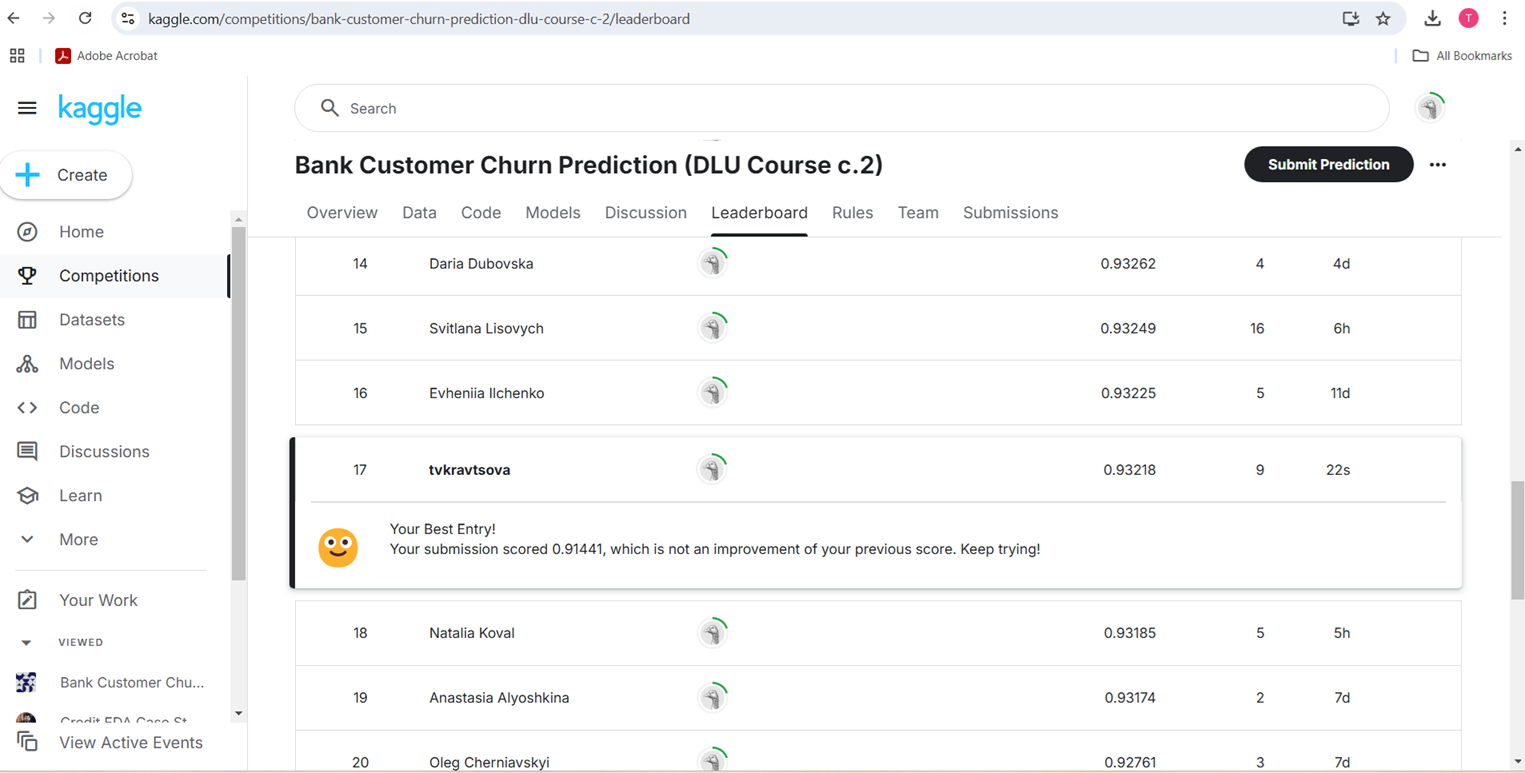

In [218]:
from IPython.display import display
from PIL import Image

image = Image.open('screenshot_kaggle2.png')
display(image)